In [1]:
%matplotlib inline

import tensorflow as tf
import construct_graph
from dataloader import DataLoader
import time

from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt


Precomputing distributions... will take a second
Done


In [2]:
BATCH_SIZE=32

sess = tf.Session()
x, y_, y_output, rebalance_ = construct_graph.setup_tensorflow_graph(BATCH_SIZE)

print "Setup dataloader"
saver = tf.train.Saver()
dataset = DataLoader(BATCH_SIZE)

print "Setup graph"
# loss = construct_graph.weighted_loss_function(y_output, y_, rebalance_)
model_name = "model/model"

prediction = construct_graph.get_prediction(y_output)
# train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)

# sess.run(tf.initialize_all_variables())
saver.restore(sess, model_name)

Setup dataloader
Setup graph


Start
[ 90.89843728  -1.54796555  73.74332384]
[  8 226  77]
[ 0.00208034  0.00208034  0.00208034  0.00208034  0.00208034  0.00208034
  0.00208034  0.00208034  0.00208034  0.00208034  0.00208034  0.00208034
  0.00208034  0.00208034  0.00208034  0.00208034  0.00208034  0.00208034
  0.00208034  0.00208034  0.00208034  0.00208034  0.00208034  0.00208034
  0.00208034  0.00208034  0.00208034  0.00208034  0.00208034  0.00208034
  0.00208034  0.00208034  0.00208034  0.00208034  0.00208034  0.00208034
  0.00387506  0.00208034  0.00208034  0.00208034  0.00208034  0.00208034
  0.00208034  0.00208034  0.00208034  0.00208034  0.00208034  0.00208034
  0.00208034  0.00208034  0.00208034  0.00208034  0.00208034  0.00208034
  0.00532377  0.00208034  0.00208034  0.00208034  0.0041008   0.00816012
  0.0078546   0.00208034  0.00208034  0.00208034  0.00208034  0.00208034
  0.01007376  0.01360746  0.00870223  0.00501167  0.00208034  0.00231761
  0.00232989  0.00307874  0.00392027  0.00208034  0.00208034  0

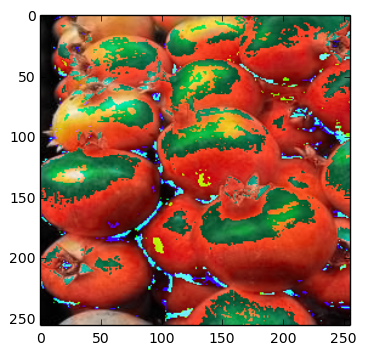

In [6]:
import numpy as np
from PIL import Image
from skimage import color

quantized_array = np.load('pts_in_hull.npy')

def get_colorized_image( image, prediction ):
    T = 0.38
    epsilon = 1e-8

    annealed_mean = np.exp( np.log(prediction + epsilon) / T ) 
    annealed_mean /= np.sum(annealed_mean, axis = 2).reshape((256,256,1))

    predicted_coloring = np.dot(annealed_mean, quantized_array)
    colorized_image = np.zeros( (256,256,3) )
    colorized_image[:,:,0:1] = image
    colorized_image[:,:,1:] = predicted_coloring

    img_array = (255 * color.lab2rgb(colorized_image)).astype(np.uint8)
                 
    print colorized_image[10][130]
    print img_array[10][130]
    print prediction[10][130]
                 
    return Image.fromarray( img_array )


import numpy as np

print "Start"

test_image_batch, _ = dataset.get_test_batch()
test_image_predictions = sess.run( prediction,  feed_dict = {x: test_image_batch} )

i = 19
# print np.sum(test_image_predictions[i], axis=2)
img = get_colorized_image(test_image_batch[i], test_image_predictions[i])
plt.imshow(img)